# Introduction to Machine Learning with Scikit-learn
## A Hands-on Workshop for Beginners

**Duration:** 45 minutes
**Instructor:** Anirban Roy
**Date:** Sep 29, 2025

---

### What We'll Learn Today:
1. What is Machine Learning and Deep Learning?
2. Supervised vs Unsupervised Learning
3. Real-world Examples with Code
4. Hands-on Practice

---

## Part 1: What is Machine Learning? 

### Imagine This Scenario:
You want to teach your friend to identify whether an email is spam or not. You could:
1. **Traditional Programming:** Write 1000s of rules (if email contains 'lottery', mark as spam)
2. **Machine Learning:** Show examples of spam and non-spam emails, let the computer learn the patterns!

### Machine Learning Definition:
**Machine Learning** is like teaching a computer to learn from experience, just like how you learned to ride a bicycle - not by reading rules, but by practicing!

### Real-Life ML Examples You Use Daily:
- 📱 **Instagram/TikTok:** Recommends posts you might like
- 🎬 **Netflix/YouTube:** Suggests videos based on your watching history
- 📧 **Gmail:** Filters spam emails automatically
- 🗣️ **Siri/Alexa:** Understands your voice commands
- 📷 **Snapchat Filters:** Detects your face and adds fun filters

## What is Deep Learning?

### The Brain Analogy:
If Machine Learning is like teaching a computer to learn, **Deep Learning** is like giving it a brain with many layers of understanding!

### Simple Comparison:
- **Machine Learning:** Like learning to recognize cats by their features (has whiskers, pointy ears, says meow)
- **Deep Learning:** Like how your brain instantly recognizes a cat without consciously thinking about each feature

### When to Use What:
- **Machine Learning:** Smaller datasets, simpler patterns (predicting house prices, classifying flowers)
- **Deep Learning:** Complex patterns, lots of data (face recognition, language translation, self-driving cars)

##  Let's Set Up Our Tools!

In [1]:
# Import our machine learning tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Make our plots look nice
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print(" ===> All tools loaded successfully! Let's start learning!")

 ===> All tools loaded successfully! Let's start learning!


## Part 2: Supervised vs Unsupervised Learning 


### Supervised Learning
**Like learning with a teacher who gives you answers**
- You get practice problems WITH answers
- You learn the pattern
- You can solve new similar problems

**Examples:**
- Predicting exam scores based on study hours
- Identifying spam emails (you show examples of spam and not-spam)
- Predicting if it will rain tomorrow

### 🔍 Unsupervised Learning
**Like exploring and finding patterns yourself**
- No teacher, no answers given
- You discover hidden patterns
- You group similar things together

**Examples:**
- Grouping customers by shopping behavior
- Finding friend groups in social networks
- Organizing your Spotify playlist by song similarity

## Example 1: Supervised Learning - Predicting Student Grades 

### The Scenario:
Can we predict a student's exam score based on how many hours they studied? Let's find out!

In [25]:
# Create a fun dataset - Study Hours vs Exam Scores
np.random.seed(42)

# Generate realistic student data
study_hours = np.random.uniform(0, 10, 100)  # 0 to 10 hours of study
# Score increases with study hours but with some randomness (life isn't perfect!)
exam_scores = 30 + 6 * study_hours + np.random.normal(0, 5, 100)
exam_scores = np.clip(exam_scores, 0, 100)  # Keep scores between 0-100

# Create a DataFrame (like an Excel sheet)
student_data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Exam_Score': exam_scores
})

print("===>  First 5 students in our dataset:")
print(student_data.head())
print(f"\n ===>  We have data for {len(student_data)} students!")

===>  First 5 students in our dataset:
   Study_Hours  Exam_Score
0     3.745401   52.907642
1     9.507143   85.547822
2     7.319939   74.378440
3     5.986585   55.981664
4     1.560186   38.262759

 ===>  We have data for 100 students!


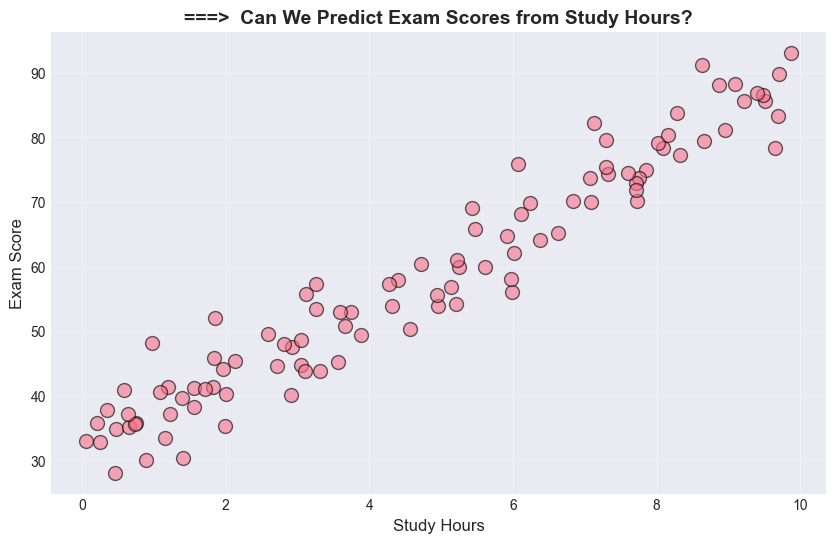

 ===> Notice: More study hours generally = Higher scores!


In [26]:
# Let's visualize the relationship!
plt.figure(figsize=(10, 6))
plt.scatter(student_data['Study_Hours'], student_data['Exam_Score'], 
            alpha=0.6, s=100, edgecolors='black', linewidth=1)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('===>  Can We Predict Exam Scores from Study Hours?', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(" ===> Notice: More study hours generally = Higher scores!")

In [27]:
# Time to train our first Machine Learning model!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare our data
X = student_data[['Study_Hours']]  # Features (what we know)
y = student_data['Exam_Score']     # Target (what we want to predict)

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📚 Training with {len(X_train)} students")
print(f"🧪 Testing with {len(X_test)} students")

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("\n===>  Model trained successfully!")
print(f"===> Formula learned: Score = {model.intercept_:.1f} + {model.coef_[0]:.1f} × Study_Hours")

📚 Training with 80 students
🧪 Testing with 20 students

===>  Model trained successfully!
===> Formula learned: Score = 30.7 + 5.8 × Study_Hours


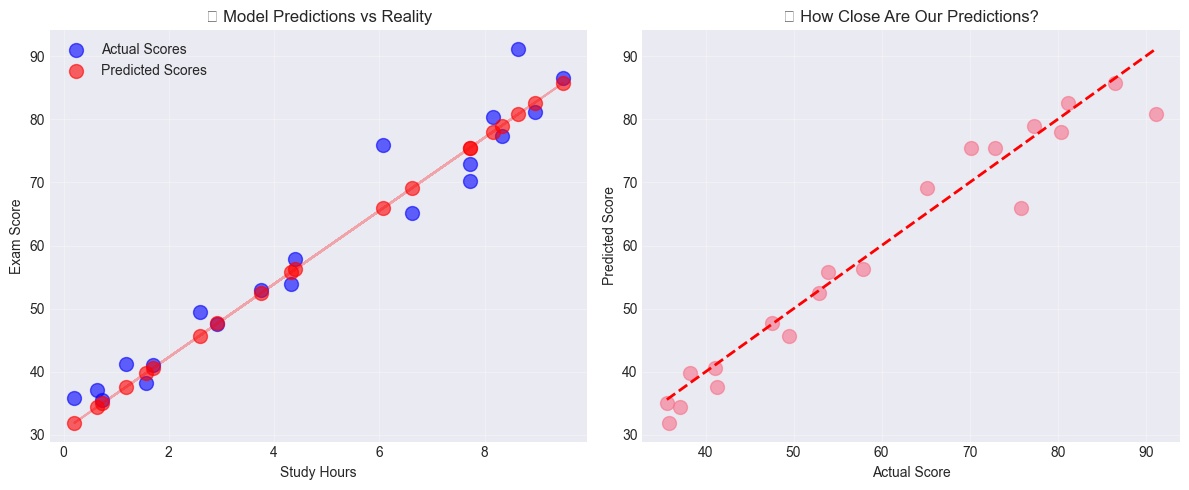


 ===>  Model Accuracy: 95.1%
===>  Average Prediction Error: ±4.0 points


In [28]:
# Make predictions and see how well we did!
y_pred = model.predict(X_test)

# Visualize predictions vs actual
plt.figure(figsize=(12, 5))

# Plot 1: Predictions on test data
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, alpha=0.6, s=100, label='Actual Scores', color='blue')
plt.scatter(X_test, y_pred, alpha=0.6, s=100, label='Predicted Scores', color='red')
plt.plot(X_test, y_pred, color='red', alpha=0.3)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('🎯 Model Predictions vs Reality')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Perfect prediction line
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('📊 How Close Are Our Predictions?')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate accuracy
accuracy = r2_score(y_test, y_pred)
print(f"\n ===>  Model Accuracy: {accuracy*100:.1f}%")
print(f"===>  Average Prediction Error: ±{np.sqrt(mean_squared_error(y_test, y_pred)):.1f} points")

In [29]:
# Let's make it interactive! Predict your score!
def predict_my_score(hours):
    score = model.predict([[hours]])[0]
    print(f"If you study for {hours} hours:")
    print(f" Predicted exam score: {score:.1f}/100")
    
    if score >= 90:
        print(" Excellent! You're on track for an A!")
    elif score >= 80:
        print(" Great job! That's a solid B!")
    elif score >= 70:
        print(" Good effort! You'll pass comfortably!")
    elif score >= 60:
        print("You'll pass, but consider studying a bit more!")
    else:
        print("Time to hit the books! You can do better!")

# Try different study hours
print(" ===> Prediction 1 <===")
predict_my_score(2)   # Minimal studying

print("\n ===> Prediction 1 <===")
predict_my_score(5)   # Average studying

print("\n===> Prediction 1 <===")
predict_my_score(8)   # Dedicated studying

 ===> Prediction 1 <===
If you study for 2 hours:
 Predicted exam score: 42.3/100
Time to hit the books! You can do better!

 ===> Prediction 1 <===
If you study for 5 hours:
 Predicted exam score: 59.7/100
Time to hit the books! You can do better!

===> Prediction 1 <===
If you study for 8 hours:
 Predicted exam score: 77.1/100
 Good effort! You'll pass comfortably!


## Example 3: Unsupervised Learning - Customer Segmentation

### The Scenario:
You own an online store and want to understand your customers better. Can we group them based on their shopping behavior? No labels, just patterns!

In [30]:
# Create a synthetic customer dataset
np.random.seed(42)

# Generate 3 types of customers (but the algorithm doesn't know this!)
n_customers = 300

# Type 1: Budget shoppers (low spending, high frequency)
budget_shoppers = np.random.normal([20, 15], [5, 3], (100, 2))

# Type 2: Regular customers (medium spending, medium frequency)
regular_customers = np.random.normal([50, 8], [10, 2], (100, 2))

# Type 3: Premium customers (high spending, low frequency)
premium_customers = np.random.normal([80, 3], [15, 1], (100, 2))

# Combine all customers (shuffle them!)
all_customers = np.vstack([budget_shoppers, regular_customers, premium_customers])
np.random.shuffle(all_customers)

# Create DataFrame
customer_df = pd.DataFrame(all_customers, columns=['Avg_Purchase_Amount', 'Monthly_Visits'])
customer_df = customer_df.clip(lower=0)  # No negative values

print("===> Customer Shopping Data:")
print(customer_df.head(10))
print(f"\n  ===>  Total customers to analyze: {len(customer_df)}")

===> Customer Shopping Data:
   Avg_Purchase_Amount  Monthly_Visits
0            14.043483       16.969661
1            17.278086       15.332768
2            81.804434        3.514439
3            40.184913        8.924207
4            20.291044       11.571089
5            18.039459       10.609455
6            90.674223        1.875358
7            16.991467       20.556835
8            15.957532       13.494729
9            41.602782        6.801215

  ===>  Total customers to analyze: 300


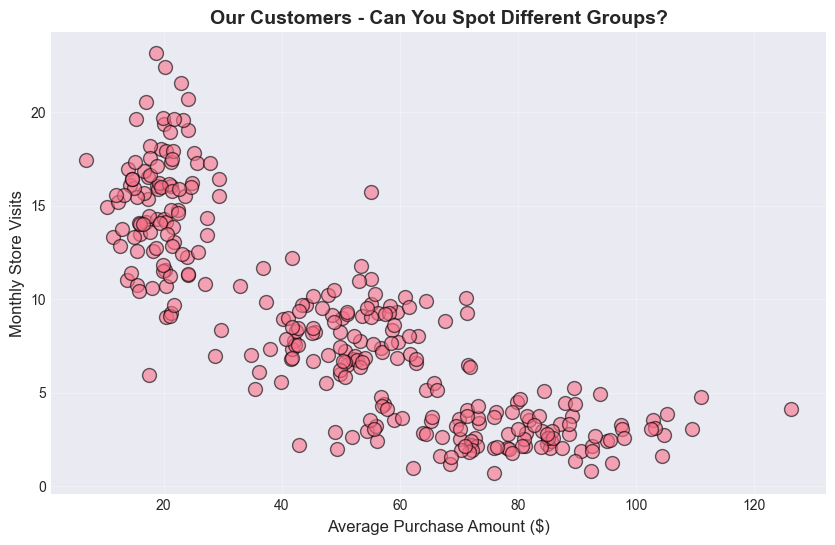

The computer doesn't know there are groups - let's see if it can find them!


In [31]:
# Visualize customer data - can you spot patterns?
plt.figure(figsize=(10, 6))
plt.scatter(customer_df['Avg_Purchase_Amount'], customer_df['Monthly_Visits'], 
            alpha=0.6, s=100, edgecolors='black', linewidth=1)
plt.xlabel('Average Purchase Amount ($)', fontsize=12)
plt.ylabel('Monthly Store Visits', fontsize=12)
plt.title('Our Customers - Can You Spot Different Groups?', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("The computer doesn't know there are groups - let's see if it can find them!")

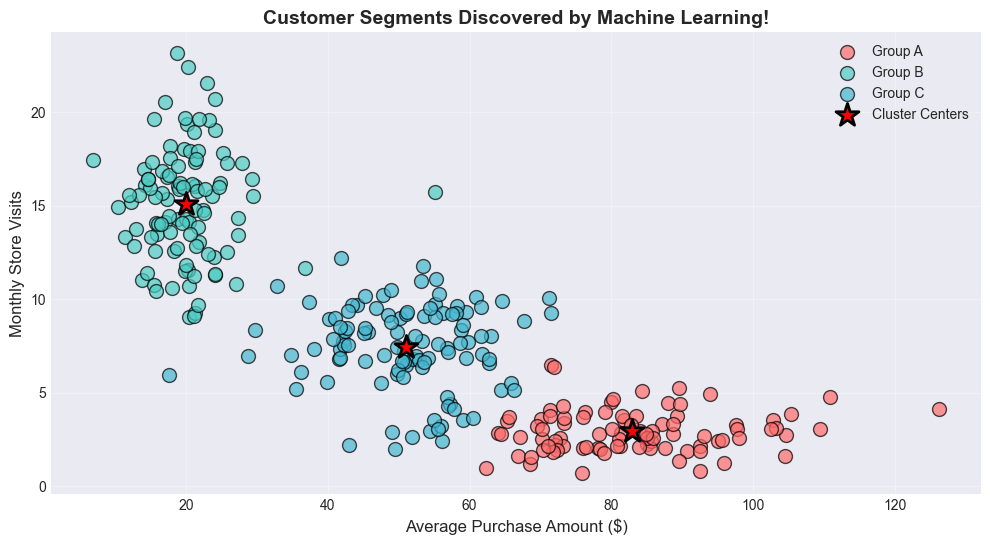

 ===>  The algorithm found 3 distinct customer groups without being told they exist!


In [32]:
# Use K-Means clustering to find customer groups
from sklearn.cluster import KMeans

# Normalize the data (important for clustering!)
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_df)

# Apply K-Means clustering (let's try 3 groups)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(customer_scaled)

# Visualize the discovered clusters
plt.figure(figsize=(12, 6))

# Plot with colors for each cluster
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
cluster_names = ['Group A', 'Group B', 'Group C']

for i in range(3):
    cluster_data = customer_df[customer_df['Cluster'] == i]
    plt.scatter(cluster_data['Avg_Purchase_Amount'], cluster_data['Monthly_Visits'],
               c=colors[i], label=cluster_names[i], s=100, alpha=0.7, edgecolors='black', linewidth=1)

# Mark cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=1, 
           edgecolors='black', linewidth=2, marker='*', label='Cluster Centers')

plt.xlabel('Average Purchase Amount ($)', fontsize=12)
plt.ylabel('Monthly Store Visits', fontsize=12)
plt.title('Customer Segments Discovered by Machine Learning!', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(" ===>  The algorithm found 3 distinct customer groups without being told they exist!")

In [33]:
# Analyze each customer segment
print("===>  CUSTOMER SEGMENT ANALYSIS")
print("="*60)

for i in range(3):
    cluster_data = customer_df[customer_df['Cluster'] == i]
    avg_purchase = cluster_data['Avg_Purchase_Amount'].mean()
    avg_visits = cluster_data['Monthly_Visits'].mean()
    
    print(f"\n{'BUDGET CONSCIOUS' if avg_purchase < 30 else ' REGULAR SHOPPERS' if avg_purchase < 60 else ' PREMIUM CUSTOMERS'}")
    print(f"Cluster {i+1}: {len(cluster_data)} customers ({len(cluster_data)/len(customer_df)*100:.1f}%)")
    print(f"Average Purchase: ${avg_purchase:.2f}")
    print(f" Monthly Visits: {avg_visits:.1f}")
    print(f" Total Monthly Value: ${avg_purchase * avg_visits:.2f}")
    
    # Marketing recommendations
    if avg_purchase < 30:
        print("📢 Strategy: Focus on bulk deals and loyalty rewards")
    elif avg_purchase < 60:
        print("📢 Strategy: Offer product recommendations and bundles")
    else:
        print("📢 Strategy: Provide VIP services and exclusive products")

print("\n" + "="*60)
print(" ===>  Now you can create targeted marketing for each group!")

===>  CUSTOMER SEGMENT ANALYSIS

 PREMIUM CUSTOMERS
Cluster 1: 90 customers (30.0%)
Average Purchase: $82.87
 Monthly Visits: 2.9
 Total Monthly Value: $242.79
📢 Strategy: Provide VIP services and exclusive products

BUDGET CONSCIOUS
Cluster 2: 102 customers (34.0%)
Average Purchase: $19.94
 Monthly Visits: 15.1
 Total Monthly Value: $300.62
📢 Strategy: Focus on bulk deals and loyalty rewards

 REGULAR SHOPPERS
Cluster 3: 108 customers (36.0%)
Average Purchase: $51.02
 Monthly Visits: 7.5
 Total Monthly Value: $380.31
📢 Strategy: Offer product recommendations and bundles

 ===>  Now you can create targeted marketing for each group!


## Example 4: Quick Real-World Applications

### Let's see more ML applications you encounter daily!

In [34]:
# Example: Simple Spam Detection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample emails (simplified)
emails = [
    "Win a free iPhone now! Click here!",
    "Meeting scheduled for tomorrow at 2 PM",
    "Get rich quick! Make $5000 weekly!",
    "Project report attached for review",
    "Congratulations! You've won $1,000,000!",
    "Can we reschedule our lunch meeting?",
    "Limited time offer! 90% discount!",
    "Here are the notes from today's class"
]

# Labels: 1 = spam, 0 = not spam
labels = [1, 0, 1, 0, 1, 0, 1, 0]

# Convert text to numbers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train spam detector
spam_detector = MultinomialNB()
spam_detector.fit(X, labels)

# Test with new emails
test_emails = [
    "You won a prize! Claim now!",
    "Tomorrow's homework is on page 45",
    "Free money! No strings attached!"
]

print("📧 SPAM DETECTION SYSTEM")
print("="*50)

for email in test_emails:
    X_test = vectorizer.transform([email])
    prediction = spam_detector.predict(X_test)[0]
    probability = spam_detector.predict_proba(X_test)[0]
    
    print(f"\n Email: '{email}'")
    print(f" Prediction: {'🚫 SPAM' if prediction == 1 else '✅ NOT SPAM'}")
    print(f" Spam Probability: {probability[1]*100:.1f}%")

📧 SPAM DETECTION SYSTEM

 Email: 'You won a prize! Claim now!'
 Prediction: 🚫 SPAM
 Spam Probability: 89.3%

 Email: 'Tomorrow's homework is on page 45'
 Prediction: ✅ NOT SPAM
 Spam Probability: 33.7%

 Email: 'Free money! No strings attached!'
 Prediction: 🚫 SPAM
 Spam Probability: 50.8%


In [35]:
# Example: Movie Recommendation (Simplified)
print("\nSIMPLE MOVIE RECOMMENDATION SYSTEM")
print("="*50)

# User ratings matrix (users x movies)
# 0 means not watched, 1-5 are ratings
user_ratings = pd.DataFrame({
    'Avatar': [5, 4, 0, 0, 5],
    'Titanic': [3, 5, 5, 0, 3],
    'Star Wars': [4, 0, 0, 5, 4],
    'The Matrix': [0, 0, 4, 5, 5],
    'Inception': [0, 4, 5, 4, 0]
}, index=['User1', 'User2', 'User3', 'User4', 'User5'])

print("Current user ratings:")
print(user_ratings)

# Find similar users using correlation
from sklearn.metrics.pairwise import cosine_similarity

# For User1, find similar users
user1_ratings = user_ratings.loc['User1'].values.reshape(1, -1)
similarities = cosine_similarity(user1_ratings, user_ratings.values)[0]

print("\n For User1:")
print("Similar users:")
for i, user in enumerate(user_ratings.index):
    if user != 'User1':
        print(f"  {user}: {similarities[i]*100:.1f}% similar")

# Recommend unwatched movies from similar users
most_similar_user = user_ratings.index[similarities.argsort()[-2]]  # Second highest (first is self)
print(f"\n ===>  Most similar user: {most_similar_user}")
print("\n ===>  Recommended movies for User1:")

user1_unwatched = user_ratings.loc['User1'][user_ratings.loc['User1'] == 0].index
for movie in user1_unwatched:
    if user_ratings.loc[most_similar_user, movie] >= 4:
        print(f"   {movie} (rated {user_ratings.loc[most_similar_user, movie]}/5 by {most_similar_user})")


SIMPLE MOVIE RECOMMENDATION SYSTEM
Current user ratings:
       Avatar  Titanic  Star Wars  The Matrix  Inception
User1       5        3          4           0          0
User2       4        5          0           0          4
User3       0        5          0           4          5
User4       0        0          5           5          4
User5       5        3          4           5          0

 For User1:
Similar users:
  User2: 65.6% similar
  User3: 26.1% similar
  User4: 34.8% similar
  User5: 81.6% similar

 ===>  Most similar user: User5

 ===>  Recommended movies for User1:
   The Matrix (rated 5/5 by User5)


## Key Takeaways

### What We Learned Today:

#### 1. **Machine Learning Basics**
   - ML = Teaching computers to learn from examples
   - No need to program every rule
   - Gets better with more data

#### 2. **Supervised Learning**
   - Has labeled data (answers provided)
   - Examples: Predicting scores, classifying flowers, detecting spam
   - Types: Regression (numbers) and Classification (categories)

#### 3. **Unsupervised Learning**
   - No labels, finds patterns itself
   - Examples: Customer grouping, movie recommendations
   - Great for discovering hidden insights

#### 4. **Real-World Applications**
   - 📱 Social Media: Content recommendations
   - 📧 Email: Spam filtering
   - 🛍️ E-commerce: Customer segmentation
   - 🎬 Entertainment: Movie/music recommendations
   - 🏥 Healthcare: Disease prediction
   - 🚗 Transportation: Traffic prediction

### 🚀 Your ML Journey Starts Here!

Remember: Machine Learning is not magic - it's math and patterns. With practice, you can build amazing things!

### 📚 What's Next?
1. Practice with the exercises notebook
2. Try different datasets
3. Experiment with parameters
4. Build your own projects!

### 🌟 Remember:
- **Start small** - Don't try to build Google on day 1
- **Experiment** - Try different models and parameters
- **Learn from mistakes** - Errors teach you the most
- **Have fun** - ML is creative and exciting!

---

Let's apply what we learned! 